In [1]:
import pybamm
import os
import numpy as np
import matplotlib.pyplot as plt
os.chdir(pybamm.__path__[0]+'/..')

In [2]:
model = pybamm.lithium_ion.DFN(options={"thermal": "lumped"})
param = pybamm.ParameterValues("OKane2023")
param.update({"Ambient temperature [K]": 283.15})
param.update({"Initial temperature [K]": 283.15})
param.update({"Maximum concentration in negative electrode [mol.m-3]": 32544})
param.update({"Maximum concentration in positive electrode [mol.m-3]": 56598})
param.update({"Initial concentration in negative electrode [mol.m-3]": 28162})
param.update({"Initial concentration in positive electrode [mol.m-3]": 15281})
exp = pybamm.Experiment(["Discharge at 1C until 2.5 V"])

pts40 = {
    "x_n": 40,  # negative electrode
    "x_s": 40,  # separator 
    "x_p": 40,  # positive electrode
    "r_n": 70,  # negative particle
    "r_p": 20,  # positive particle
}

sim40 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts40)
solution40 = sim40.solve(calc_esoh=False)

pts20 = {
    "x_n": 20,  # negative electrode
    "x_s": 20,  # separator 
    "x_p": 20,  # positive electrode
    "r_n": 70,  # negative particle
    "r_p": 20,  # positive particle
}

sim20 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts20)
solution20 = sim20.solve(calc_esoh=False)

pts10 = {
    "x_n": 10,  # negative electrode
    "x_s": 10,  # separator 
    "x_p": 10,  # positive electrode
    "r_n": 70,  # negative particle
    "r_p": 20,  # positive particle
}

sim10 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts10)
solution10 = sim10.solve(calc_esoh=False)

pts5 = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 70,  # negative particle
    "r_p": 20,  # positive particle
}

sim5 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts5)
solution5 = sim5.solve(calc_esoh=False)

pts3 = {
    "x_n": 3,  # negative electrode
    "x_s": 3,  # separator 
    "x_p": 3,  # positive electrode
    "r_n": 70,  # negative particle
    "r_p": 20,  # positive particle
}

sim3 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts3)
solution3 = sim3.solve(calc_esoh=False)

In [3]:
t40 = solution40["Time [s]"].entries
Q40 = solution40["Discharge capacity [A.h]"].entries
V40 = solution40["Terminal voltage [V]"].entries
T40 = solution40["Volume-averaged cell temperature [K]"].entries
t20 = solution20["Time [s]"].entries
Q20 = solution20["Discharge capacity [A.h]"].entries
V20 = solution20["Terminal voltage [V]"].entries
T20 = solution20["Volume-averaged cell temperature [K]"].entries
Q10 = solution10["Discharge capacity [A.h]"].entries
t10 = solution10["Time [s]"].entries
V10 = solution10["Terminal voltage [V]"].entries
T10 = solution10["Volume-averaged cell temperature [K]"].entries
t5 = solution5["Time [s]"].entries
Q5 = solution5["Discharge capacity [A.h]"].entries
V5 = solution5["Terminal voltage [V]"].entries
T5 = solution5["Volume-averaged cell temperature [K]"].entries
t3 = solution3["Time [s]"].entries
Q3 = solution3["Discharge capacity [A.h]"].entries
V3 = solution3["Terminal voltage [V]"].entries
T3 = solution3["Volume-averaged cell temperature [K]"].entries

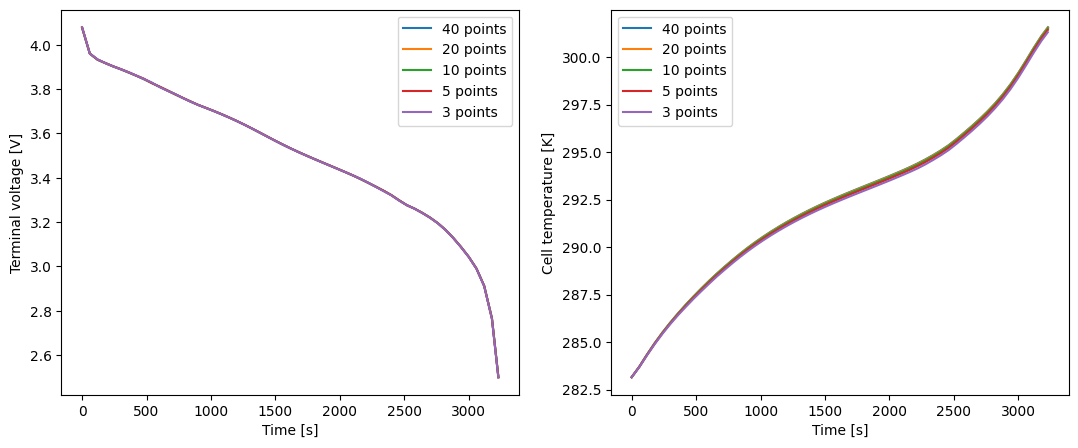

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13,5))
ax1.plot(t40,V40,label="40 points")
ax1.plot(t20,V20,label="20 points")
ax1.plot(t10,V10,label="10 points")
ax1.plot(t5,V5,label="5 points")
ax1.plot(t3,V3,label="3 points")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Terminal voltage [V]")
ax1.legend()
ax2.plot(t40,T40,label="40 points")
ax2.plot(t20,T20,label="20 points")
ax2.plot(t10,T10,label="10 points")
ax2.plot(t5,T5,label="5 points")
ax2.plot(t3,T3,label="3 points")
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Cell temperature [K]")
ax2.legend()
#plt.savefig("/mnt/c/Users/sokane/pybamm_data/mesh_refinement/x_mesh_refinement.pdf")
plt.show()

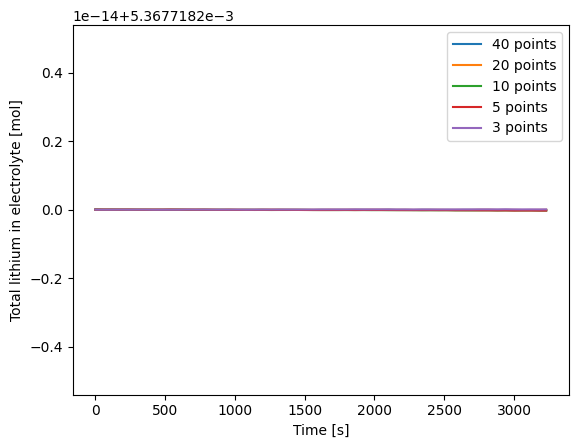

In [5]:
n_Li40 = solution40["Total lithium in electrolyte [mol]"].entries
n_Li20 = solution20["Total lithium in electrolyte [mol]"].entries
n_Li10 = solution10["Total lithium in electrolyte [mol]"].entries
n_Li5 = solution5["Total lithium in electrolyte [mol]"].entries
n_Li3 = solution3["Total lithium in electrolyte [mol]"].entries
fig, ax = plt.subplots()
ax.plot(t40,n_Li40,label="40 points")
ax.plot(t20,n_Li20,label="20 points")
ax.plot(t10,n_Li10,label="10 points")
ax.plot(t5,n_Li5,label="5 points")
ax.plot(t3,n_Li3,label="3 points")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Total lithium in electrolyte [mol]")
ax.legend()
plt.show()